In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [3]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [5]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7919 - loss: 0.6621 - val_accuracy: 0.9816 - val_loss: 0.0608
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9685 - loss: 0.1078 - val_accuracy: 0.9883 - val_loss: 0.0380
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9777 - loss: 0.0730 - val_accuracy: 0.9884 - val_loss: 0.0335
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9833 - loss: 0.0570 - val_accuracy: 0.9899 - val_loss: 0.0301
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9857 - loss: 0.0480 - val_accuracy: 0.9898 - val_loss: 0.0288
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0431 - val_accuracy: 0.9905 - val_loss: 0.0268
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9894 - loss: 0.0343 - val_accuracy: 0.9910 - val_loss: 0.0284
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9902 - loss: 0.0312 - val_accuracy: 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0278
Test Accuracy: 0.9919
Test loss: 0.0231


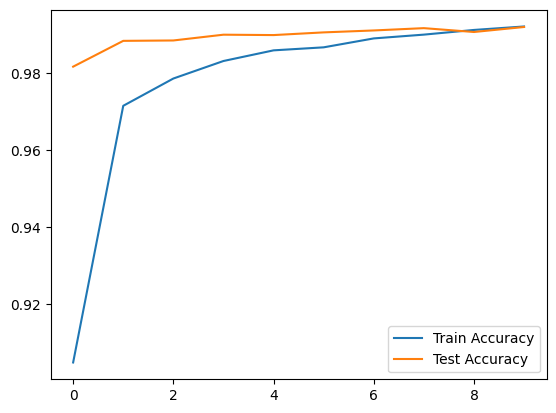

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

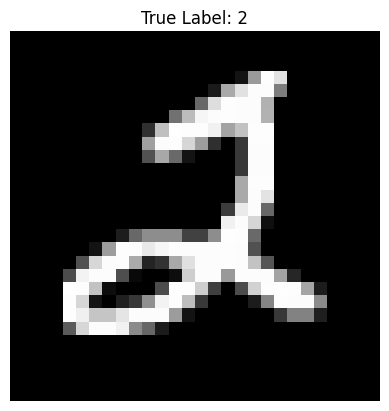

In [18]:
import numpy as np
import matplotlib.pyplot as plt

index = np.random.randint(0, x_test.shape[0])
img = x_test[index]
true_label = y_test[index]

plt.imshow(img.reshape(28,28), cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()


In [19]:
img_input = img.reshape(1, 28, 28, 1)

prediction = model.predict(img_input)

predicted_digit = np.argmax(prediction)
print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted digit: 2


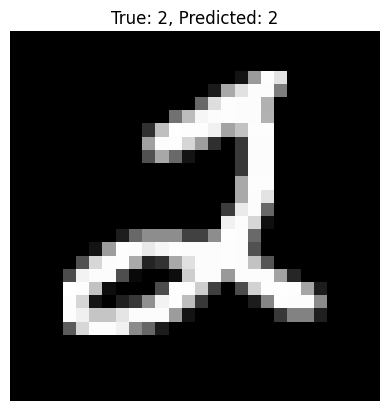

In [20]:
plt.imshow(img.reshape(28,28), cmap='gray')
plt.title(f"True: {true_label}, Predicted: {predicted_digit}")
plt.axis('off')
plt.show()


In [21]:
for _ in range(5):
    index = np.random.randint(0, x_test.shape[0])
    img = x_test[index]
    true_label = y_test[index]
    prediction = model.predict(img.reshape(1,28,28,1))
    predicted_digit = np.argmax(prediction)
    print(f"True: {true_label}, Predicted: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
True: 0, Predicted: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
True: 5, Predicted: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
True: 9, Predicted: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
True: 2, Predicted: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
True: 9, Predicted: 9
